In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPool1D, Flatten, Dropout
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, Dropout
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense
from keras.layers import Dense, Conv1D, MaxPool1D, Flatten, Dropout
from tensorflow.keras.layers import SimpleRNN, Dropout, Dense, Bidirectional
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Dense, Conv1D, MaxPool1D, Flatten,LSTM

In [ ]:
train_w = pd.read_csv('/content/word2vec-train.csv')
test_w = pd.read_csv('/content/word2vec-test.csv')
train_f = pd.read_csv('/content/fasttext-train.csv')
test_f = pd.read_csv('/content/fasttext-test.csv')
train_p = pd.read_csv('/content/PAAC-train.csv')
test_p = pd.read_csv('/content/PAAC-test.csv')
train_a = pd.read_csv('/content/APAAC-train.csv')
test_a = pd.read_csv('/content/APAAC-test.csv')
train_q = pd.read_csv('/content/QSOrder-train.csv')
test_q = pd.read_csv('/content/QSOrder-test.csv')

In [ ]:
xtrain_w = train_w.drop(['Target'], axis=1)
ytrain_w = train_w['Target']

xtrain_f = train_f.drop(['Target'], axis=1)
ytrain_f = train_f['Target']

xtrain_p = train_p.drop(['Target'], axis=1)
ytrain_p = train_p['Target']

xtrain_a = train_a.drop(['Target'], axis=1)
ytrain_a = train_a['Target']

xtrain_q = train_q.drop(['Target'], axis=1)
ytrain_q = train_q['Target']

In [ ]:
xtest_w = test_w.drop(['Target'], axis=1)
ytest_w = test_w['Target']

xtest_f = test_f.drop(['Target'], axis=1)
ytest_f = test_f['Target']

xtest_p = test_p.drop(['Target'], axis=1)
ytest_p = test_p['Target']

xtest_a = test_a.drop(['Target'], axis=1)
ytest_a = test_a['Target']

xtest_q = test_q.drop(['Target'], axis=1)
ytest_q = test_q['Target']

In [ ]:
sample_size_w = xtrain_w.shape[0]  # number of samples in train set
time_steps_w  = xtrain_w.shape[1]  # number of features in train set
input_dimension = 1                # each feature is represented by 1 number

sample_size_f = xtrain_f.shape[0]  # number of samples in train set
time_steps_f  = xtrain_f.shape[1]  # number of features in train set
input_dimension = 1                # each feature is represented by 1

sample_size_p = xtrain_p.shape[0]  # number of samples in train set
time_steps_p  = xtrain_p.shape[1]  # number of features in train set
input_dimension = 1                # each feature is represented by 1

sample_size_a = xtrain_a.shape[0]  # number of samples in train set
time_steps_a  = xtrain_a.shape[1]  # number of features in train set
input_dimension = 1                # each feature is represented by 1

sample_size_q = xtrain_q.shape[0]  # number of samples in train set
time_steps_q  = xtrain_q.shape[1]  # number of features in train set
input_dimension = 1                # each feature is represented by 1

In [ ]:
train_data_reshaped_w = xtrain_w.values.reshape(sample_size_w, time_steps_w, input_dimension)
n_timesteps_w = train_data_reshaped_w.shape[1]
n_features_w  = train_data_reshaped_w.shape[2]

train_data_reshaped_f = xtrain_f.values.reshape(sample_size_f, time_steps_f, input_dimension)
n_timesteps_f = train_data_reshaped_f.shape[1]
n_features_f  = train_data_reshaped_f.shape[2]

train_data_reshaped_p = xtrain_p.values.reshape(sample_size_p, time_steps_p, input_dimension)
n_timesteps_p = train_data_reshaped_p.shape[1]
n_features_p  = train_data_reshaped_p.shape[2]

train_data_reshaped_a = xtrain_a.values.reshape(sample_size_a, time_steps_a, input_dimension)
n_timesteps_a = train_data_reshaped_a.shape[1]
n_features_a  = train_data_reshaped_a.shape[2]

train_data_reshaped_q = xtrain_q.values.reshape(sample_size_q, time_steps_q, input_dimension)
n_timesteps_q = train_data_reshaped_q.shape[1]
n_features_q  = train_data_reshaped_q.shape[2]

In [ ]:
#Build ANN Model

ann_w = Sequential()

ann_w.add(Dense(128, activation = 'relu', input_shape=(n_timesteps_w,n_features_w)))
ann_w.add(Dense(64, activation = 'relu'))

ann_w.add(MaxPool1D(pool_size=2))

ann_w.add(Flatten())

ann_w.add(Dense(64, activation='relu'))
ann_w.add(Dense(1, activation='sigmoid'))

ann_w.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


# Build ANN Model
ann_f = Sequential()
ann_f.add(Dense(128, activation='relu', input_shape=(n_timesteps_f, n_features_f)))
ann_f.add(Dense(64, activation='relu'))
ann_f.add(MaxPool1D(pool_size=2))
ann_f.add(Flatten())
ann_f.add(Dense(64, activation='relu'))
ann_f.add(Dense(1, activation='sigmoid'))
ann_f.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Build ANN Model
ann_p = Sequential()
ann_p.add(Dense(128, activation='relu', input_shape=(n_timesteps_p, n_features_p)))
ann_p.add(Dense(64, activation='relu'))
ann_p.add(MaxPool1D(pool_size=2))
ann_p.add(Flatten())
ann_p.add(Dense(64, activation='relu'))
ann_p.add(Dense(1, activation='sigmoid'))
ann_p.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Build ANN Model
ann_a = Sequential()
ann_a.add(Dense(128, activation='relu', input_shape=(n_timesteps_a, n_features_a)))
ann_a.add(Dense(64, activation='relu'))
ann_a.add(MaxPool1D(pool_size=2))
ann_a.add(Flatten())
ann_a.add(Dense(64, activation='relu'))
ann_a.add(Dense(1, activation='sigmoid'))
ann_a.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Build ANN Model
ann_q = Sequential()
ann_q.add(Dense(128, activation='relu', input_shape=(n_timesteps_q, n_features_q)))
ann_q.add(Dense(64, activation='relu'))
ann_q.add(MaxPool1D(pool_size=2))
ann_q.add(Flatten())
ann_q.add(Dense(64, activation='relu'))
ann_q.add(Dense(1, activation='sigmoid'))
ann_q.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Build CNN Model

cnn_w = Sequential()

cnn_w.add(Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(n_timesteps_w,n_features_w)))
cnn_w.add(Conv1D(filters=64, kernel_size=3, activation='relu'))

cnn_w.add(MaxPool1D(pool_size=2))

cnn_w.add(Flatten())

cnn_w.add(Dense(64, activation='relu'))
cnn_w.add(Dense(1, activation='sigmoid'))

cnn_w.compile(optimizer=Adam(learning_rate=0.0001), loss = 'binary_crossentropy', metrics = ['accuracy'])

#Build CNN Model

cnn_f = Sequential()

cnn_f.add(Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(n_timesteps_f,n_features_f)))
cnn_f.add(Conv1D(filters=64, kernel_size=3, activation='relu'))

cnn_f.add(MaxPool1D(pool_size=2))

cnn_f.add(Flatten())

cnn_f.add(Dense(64, activation='relu'))
cnn_f.add(Dense(1, activation='sigmoid'))

cnn_f.compile(optimizer=Adam(learning_rate=0.0001), loss = 'binary_crossentropy', metrics = ['accuracy'])



#Build CNN Model

cnn_p = Sequential()

cnn_p.add(Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(n_timesteps_p,n_features_p)))
cnn_p.add(Conv1D(filters=64, kernel_size=3, activation='relu'))

cnn_p.add(MaxPool1D(pool_size=2))

cnn_p.add(Flatten())

cnn_p.add(Dense(64, activation='relu'))
cnn_p.add(Dense(1, activation='sigmoid'))

cnn_p.compile(optimizer=Adam(learning_rate=0.0001), loss = 'binary_crossentropy', metrics = ['accuracy'])



#Build CNN Model

cnn_a = Sequential()

cnn_a.add(Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(n_timesteps_a,n_features_a)))
cnn_a.add(Conv1D(filters=64, kernel_size=3, activation='relu'))

cnn_a.add(MaxPool1D(pool_size=2))

cnn_a.add(Flatten())

cnn_a.add(Dense(64, activation='relu'))
cnn_a.add(Dense(1, activation='sigmoid'))

cnn_a.compile(optimizer=Adam(learning_rate=0.0001), loss = 'binary_crossentropy', metrics = ['accuracy'])



#Build CNN Model

cnn_q = Sequential()

cnn_q.add(Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(n_timesteps_q,n_features_q)))
cnn_q.add(Conv1D(filters=64, kernel_size=3, activation='relu'))

cnn_q.add(MaxPool1D(pool_size=2))

cnn_q.add(Flatten())

cnn_q.add(Dense(64, activation='relu'))
cnn_q.add(Dense(1, activation='sigmoid'))

cnn_q.compile(optimizer=Adam(learning_rate=0.0001), loss = 'binary_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Build RNN model
rnn_w = Sequential()

# RNN layers
rnn_w.add(SimpleRNN(128, activation='tanh', return_sequences=True, input_shape=(n_timesteps_w,n_features_w)))
rnn_w.add(SimpleRNN(32, activation='tanh', return_sequences=False))

rnn_w.add(Flatten())

# Fully connected layers
rnn_w.add(Dense(64, activation='relu'))
rnn_w.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
rnn_w.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


# Build RNN model
rnn_f = Sequential()

# RNN layers
rnn_f.add(SimpleRNN(128, activation='tanh', return_sequences=True, input_shape=(n_timesteps_f,n_features_f)))
rnn_f.add(SimpleRNN(32, activation='tanh', return_sequences=False))

rnn_f.add(Flatten())

# Fully connected layers
rnn_f.add(Dense(64, activation='relu'))
rnn_f.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
rnn_f.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])



# Build RNN model
rnn_p = Sequential()

# RNN layers
rnn_p.add(SimpleRNN(128, activation='tanh', return_sequences=True, input_shape=(n_timesteps_p,n_features_p)))
rnn_p.add(SimpleRNN(32, activation='tanh', return_sequences=False))

rnn_p.add(Flatten())

# Fully connected layers
rnn_p.add(Dense(64, activation='relu'))
rnn_p.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
rnn_p.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])



# Build RNN model
rnn_a = Sequential()

# RNN layers
rnn_a.add(SimpleRNN(128, activation='tanh', return_sequences=True, input_shape=(n_timesteps_a,n_features_a)))
rnn_a.add(SimpleRNN(32, activation='tanh', return_sequences=False))

rnn_a.add(Flatten())

# Fully connected layers
rnn_a.add(Dense(64, activation='relu'))
rnn_a.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
rnn_a.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])



# Build RNN model
rnn_q = Sequential()

# RNN layers
rnn_q.add(SimpleRNN(128, activation='tanh', return_sequences=True, input_shape=(n_timesteps_q,n_features_q)))
rnn_q.add(SimpleRNN(32, activation='tanh', return_sequences=False))

rnn_q.add(Flatten())

# Fully connected layers
rnn_q.add(Dense(64, activation='relu'))
rnn_q.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
rnn_q.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Build the GRU model
gru_w = Sequential()
gru_w.add(GRU(128, activation='tanh', return_sequences=True, input_shape=(n_timesteps_w,n_features_w)))
gru_w.add(GRU(32, activation='tanh', return_sequences=False))

gru_w.add(Dense(64, activation='relu'))
gru_w.add(Dense(1, activation='sigmoid'))

# Compile the model
gru_w.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Build the GRU model
gru_f = Sequential()
gru_f.add(GRU(128, activation='tanh', return_sequences=True, input_shape=(n_timesteps_f,n_features_f)))
gru_f.add(GRU(32, activation='tanh', return_sequences=False))

gru_f.add(Dense(64, activation='relu'))
gru_f.add(Dense(1, activation='sigmoid'))

# Compile the model
gru_f.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])



# Build the GRU model
gru_p = Sequential()
gru_p.add(GRU(128, activation='tanh', return_sequences=True, input_shape=(n_timesteps_p,n_features_p)))
gru_p.add(GRU(32, activation='tanh', return_sequences=False))

gru_p.add(Dense(64, activation='relu'))
gru_p.add(Dense(1, activation='sigmoid'))

# Compile the model
gru_p.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])



# Build the GRU model
gru_a = Sequential()
gru_a.add(GRU(128, activation='tanh', return_sequences=True, input_shape=(n_timesteps_a,n_features_a)))
gru_a.add(GRU(32, activation='tanh', return_sequences=False))

gru_a.add(Dense(64, activation='relu'))
gru_a.add(Dense(1, activation='sigmoid'))

# Compile the model
gru_a.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])



# Build the GRU model
gru_q = Sequential()
gru_q.add(GRU(128, activation='tanh', return_sequences=True, input_shape=(n_timesteps_q,n_features_q)))
gru_q.add(GRU(32, activation='tanh', return_sequences=False))

gru_q.add(Dense(64, activation='relu'))
gru_q.add(Dense(1, activation='sigmoid'))

# Compile the model
gru_q.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Build the LSTM model
lstm_w = Sequential()
lstm_w.add(LSTM(128, activation='tanh', return_sequences=True, input_shape=(n_timesteps_w,n_features_w)))
lstm_w.add(LSTM(32, activation='tanh', return_sequences=False))

lstm_w.add(Flatten())

lstm_w.add(Dense(64, activation='relu'))
lstm_w.add(Dense(1, activation='sigmoid'))

# Compile the model
lstm_w.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


# Build the LSTM model
lstm_f = Sequential()
lstm_f.add(LSTM(128, activation='tanh', return_sequences=True, input_shape=(n_timesteps_f,n_features_f)))
lstm_f.add(LSTM(32, activation='tanh', return_sequences=False))

lstm_f.add(Flatten())

lstm_f.add(Dense(64, activation='relu'))
lstm_f.add(Dense(1, activation='sigmoid'))

# Compile the model
lstm_f.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])



# Build the LSTM model
lstm_p = Sequential()
lstm_p.add(LSTM(128, activation='tanh', return_sequences=True, input_shape=(n_timesteps_p,n_features_p)))
lstm_p.add(LSTM(32, activation='tanh', return_sequences=False))

lstm_p.add(Flatten())

lstm_p.add(Dense(64, activation='relu'))
lstm_p.add(Dense(1, activation='sigmoid'))

# Compile the model
lstm_p.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])



# Build the LSTM model
lstm_a = Sequential()
lstm_a.add(LSTM(128, activation='tanh', return_sequences=True, input_shape=(n_timesteps_a,n_features_a)))
lstm_a.add(LSTM(32, activation='tanh', return_sequences=False))

lstm_a.add(Flatten())

lstm_a.add(Dense(64, activation='relu'))
lstm_a.add(Dense(1, activation='sigmoid'))

# Compile the model
lstm_a.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])



# Build the LSTM model
lstm_q = Sequential()
lstm_q.add(LSTM(128, activation='tanh', return_sequences=True, input_shape=(n_timesteps_q,n_features_q)))
lstm_q.add(LSTM(32, activation='tanh', return_sequences=False))

lstm_q.add(Flatten())

lstm_q.add(Dense(64, activation='relu'))
lstm_q.add(Dense(1, activation='sigmoid'))

# Compile the model
lstm_q.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Build the iAP_W2V_BiLSTM model
iAP_W2V_BiLSTM_w = Sequential()

# Add a Bi-directional LSTM layer
iAP_W2V_BiLSTM_w.add(Bidirectional(LSTM(128, activation='tanh', return_sequences=True), input_shape=(n_timesteps_w,n_features_w)))
iAP_W2V_BiLSTM_w.add(Bidirectional(LSTM(64, activation='tanh', return_sequences=False)))

# Add fully connected layers
iAP_W2V_BiLSTM_w.add(Dense(64, activation='relu'))
iAP_W2V_BiLSTM_w.add(Dense(1, activation='sigmoid'))  # Binary classification output

# Compile the model
iAP_W2V_BiLSTM_w.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


# Build the iAP_W2V_BiLSTM model
iAP_W2V_BiLSTM_f = Sequential()

# Add a Bi-directional LSTM layer
iAP_W2V_BiLSTM_f.add(Bidirectional(LSTM(128, activation='tanh', return_sequences=True), input_shape=(n_timesteps_f,n_features_f)))
iAP_W2V_BiLSTM_f.add(Bidirectional(LSTM(64, activation='tanh', return_sequences=False)))

# Add fully connected layers
iAP_W2V_BiLSTM_f.add(Dense(64, activation='relu'))
iAP_W2V_BiLSTM_f.add(Dense(1, activation='sigmoid'))  # Binary classification output

# Compile the model
iAP_W2V_BiLSTM_f.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])



# Build the iAP_W2V_BiLSTM model
iAP_W2V_BiLSTM_p = Sequential()

# Add a Bi-directional LSTM layer
iAP_W2V_BiLSTM_p.add(Bidirectional(LSTM(128, activation='tanh', return_sequences=True), input_shape=(n_timesteps_p,n_features_p)))
iAP_W2V_BiLSTM_p.add(Bidirectional(LSTM(64, activation='tanh', return_sequences=False)))

# Add fully connected layers
iAP_W2V_BiLSTM_p.add(Dense(64, activation='relu'))
iAP_W2V_BiLSTM_p.add(Dense(1, activation='sigmoid'))  # Binary classification output

# Compile the model
iAP_W2V_BiLSTM_p.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])



# Build the iAP_W2V_BiLSTM model
iAP_W2V_BiLSTM_a = Sequential()

# Add a Bi-directional LSTM layer
iAP_W2V_BiLSTM_a.add(Bidirectional(LSTM(128, activation='tanh', return_sequences=True), input_shape=(n_timesteps_a,n_features_a)))
iAP_W2V_BiLSTM_a.add(Bidirectional(LSTM(64, activation='tanh', return_sequences=False)))

# Add fully connected layers
iAP_W2V_BiLSTM_a.add(Dense(64, activation='relu'))
iAP_W2V_BiLSTM_a.add(Dense(1, activation='sigmoid'))  # Binary classification output

# Compile the model
iAP_W2V_BiLSTM_a.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])



# Build the iAP_W2V_BiLSTM model
iAP_W2V_BiLSTM_q = Sequential()

# Add a Bi-directional LSTM layer
iAP_W2V_BiLSTM_q.add(Bidirectional(LSTM(128, activation='tanh', return_sequences=True), input_shape=(n_timesteps_q,n_features_q)))
iAP_W2V_BiLSTM_q.add(Bidirectional(LSTM(64, activation='tanh', return_sequences=False)))

# Add fully connected layers
iAP_W2V_BiLSTM_q.add(Dense(64, activation='relu'))
iAP_W2V_BiLSTM_q.add(Dense(1, activation='sigmoid'))  # Binary classification output

# Compile the model
iAP_W2V_BiLSTM_q.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8381 - loss: 0.4902
Epoch 2/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 1.0000 - loss: 0.0180
Epoch 3/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9999 - loss: 0.0034
Epoch 4/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 1.0000 - loss: 0.0015
Epoch 5/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 1.0000 - loss: 7.8906e-04
Epoch 6/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 1.0000 - loss: 5.2695e-04
Epoch 7/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 1.0000 - loss: 3.1504e-04
Epoch 8/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 1.0000 - loss: 2.6196e-04
Epoch 9/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 1.0000 - loss: 1.7740e-04
Epoch 10/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 1.0000 - loss: 1.3318e-04
Epoch 11/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 1.0000 - loss: 1.1204e-04
Epoch 12/50
2

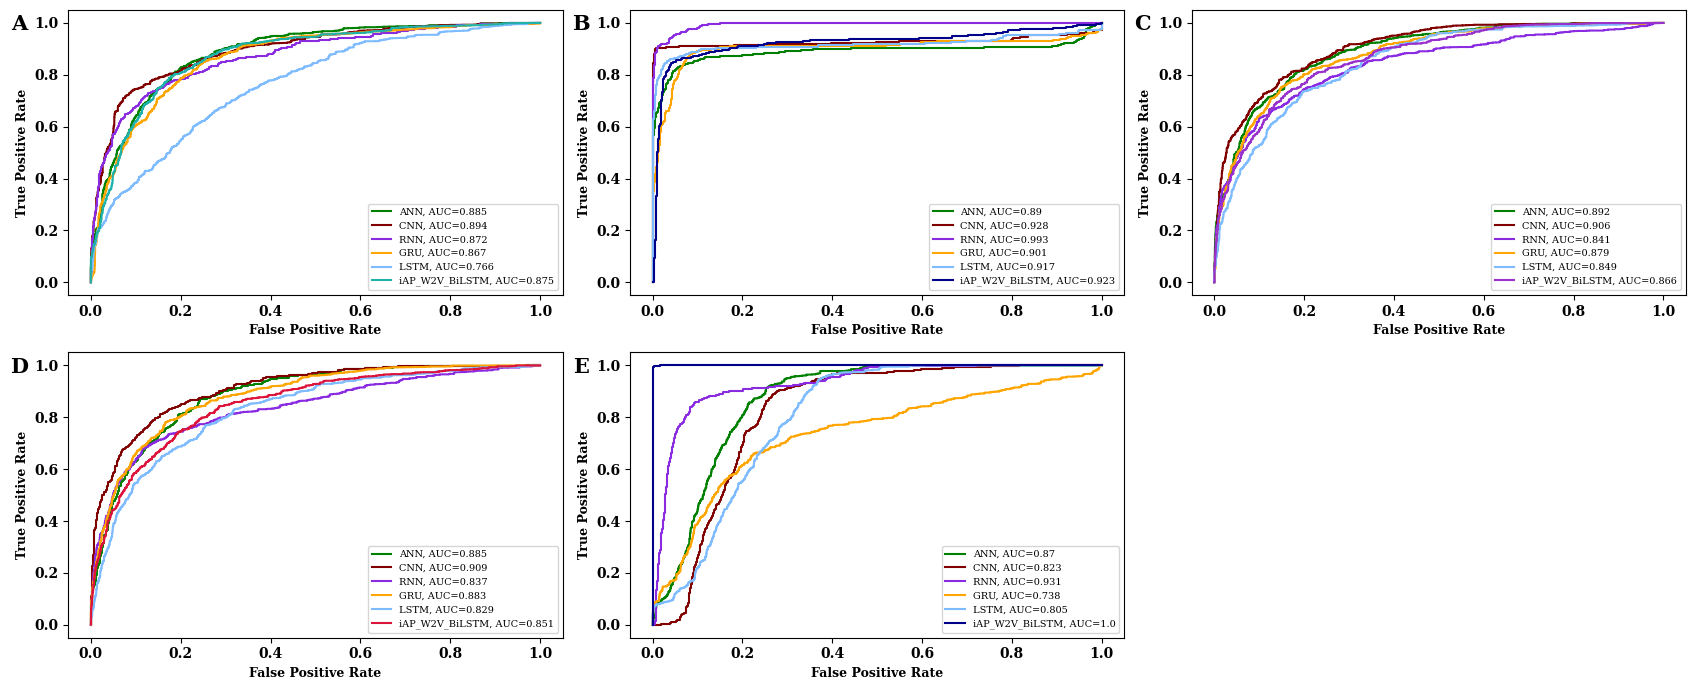

In [ ]:
plt.rcParams["figure.figsize"] = [17, 7]
#plt.rcParams["figure.autolayout"] = True

ax = plt.GridSpec(2, 3)
plt.rcParams.update({'font.family':'serif'})

ax1 = plt.subplot(ax[1,1])
plt.title('E', weight='bold',  fontsize=15, y = 0.90, x=-0.10)
plt.xticks(weight='bold')
plt.yticks(weight='bold')

ann_w.fit(xtrain_w, ytrain_w, epochs = 50, batch_size= 64)
cnn_w.fit(xtrain_w, ytrain_w, epochs = 50, batch_size= 64)
rnn_w.fit(xtrain_w, ytrain_w, epochs = 50, batch_size= 64)
gru_w.fit(xtrain_w, ytrain_w, epochs = 40, batch_size= 64)
lstm_w.fit(xtrain_w, ytrain_w, epochs = 40, batch_size= 64)
iAP_W2V_BiLSTM_w.fit(xtrain_w, ytrain_w, epochs = 40, batch_size= 64)

pred = ann_w.predict(xtest_w).ravel()
fpr, tpr, _ = metrics.roc_curve(ytest_w, pred)
auc = round(metrics.roc_auc_score(ytest_w, pred), 3)
plt.plot(fpr,tpr, color="#008000", label="ANN, AUC="+str(auc))

pred = cnn_w.predict(xtest_w).ravel()
fpr, tpr, _ = metrics.roc_curve(ytest_w, pred)
auc = round(metrics.roc_auc_score(ytest_w, pred), 3)
plt.plot(fpr,tpr, color="#800000", label="CNN, AUC="+str(auc))

pred = rnn_w.predict(xtest_w).ravel()
fpr, tpr, _ = metrics.roc_curve(ytest_w, pred)
auc = round(metrics.roc_auc_score(ytest_w, pred), 3)
plt.plot(fpr,tpr, color="#8A2BE2", label="RNN, AUC="+str(auc))

pred = gru_w.predict(xtest_w).ravel()
fpr, tpr, _ = metrics.roc_curve(ytest_w, pred)
auc = round(metrics.roc_auc_score(ytest_w, pred), 3)
plt.plot(fpr,tpr, color="#FFA500", label="GRU, AUC="+str(auc))

pred = lstm_w.predict(xtest_w).ravel()
fpr, tpr, _ = metrics.roc_curve(ytest_w, pred)
auc = round(metrics.roc_auc_score(ytest_w, pred), 3)
plt.plot(fpr,tpr, color="#7FBCFF", label="LSTM, AUC="+str(auc))

pred = iAP_W2V_BiLSTM_w.predict(xtest_w).ravel()
fpr, tpr, _ = metrics.roc_curve(ytest_w, pred)
auc = round(metrics.roc_auc_score(ytest_w, pred), 3)
plt.plot(fpr,tpr, color="#00008B", label="iAP_W2V_BiLSTM, AUC="+str(auc))

plt.xlabel('False Positive Rate', fontweight = 'bold',  fontsize=9)
plt.ylabel('True Positive Rate', fontweight = 'bold',  fontsize=9)
plt.legend(loc = 'lower right', fontsize=7)

###

ax1 = plt.subplot(ax[0,1])
plt.title('B', weight='bold',  fontsize=15, y = 0.90, x=-0.10)
plt.xticks(weight='bold')
plt.yticks(weight='bold')

ann_f.fit(xtrain_f, ytrain_f, epochs=50, batch_size=64)
cnn_f.fit(xtrain_f, ytrain_f, epochs=50, batch_size=64)
rnn_f.fit(xtrain_f, ytrain_f, epochs=50, batch_size=64)
gru_f.fit(xtrain_f, ytrain_f, epochs=40, batch_size=64)
lstm_f.fit(xtrain_f, ytrain_f, epochs=40, batch_size=64)
iAP_W2V_BiLSTM_f.fit(xtrain_f, ytrain_f, epochs=40, batch_size=64)

pred = ann_f.predict(xtest_f).ravel()
fpr, tpr, _ = metrics.roc_curve(ytest_f, pred)
auc = round(metrics.roc_auc_score(ytest_f, pred), 3)
plt.plot(fpr, tpr, color="#008000", label="ANN, AUC=" + str(auc))

pred = cnn_f.predict(xtest_f).ravel()
fpr, tpr, _ = metrics.roc_curve(ytest_f, pred)
auc = round(metrics.roc_auc_score(ytest_f, pred), 3)
plt.plot(fpr, tpr, color="#800000", label="CNN, AUC=" + str(auc))

pred = rnn_f.predict(xtest_f).ravel()
fpr, tpr, _ = metrics.roc_curve(ytest_f, pred)
auc = round(metrics.roc_auc_score(ytest_f, pred), 3)
plt.plot(fpr, tpr, color="#8A2BE2", label="RNN, AUC=" + str(auc))

pred = gru_f.predict(xtest_f).ravel()
fpr, tpr, _ = metrics.roc_curve(ytest_f, pred)
auc = round(metrics.roc_auc_score(ytest_f, pred), 3)
plt.plot(fpr, tpr, color="#FFA500", label="GRU, AUC=" + str(auc))

pred = lstm_f.predict(xtest_f).ravel()
fpr, tpr, _ = metrics.roc_curve(ytest_f, pred)
auc = round(metrics.roc_auc_score(ytest_f, pred), 3)
plt.plot(fpr, tpr, color="#7FBCFF", label="LSTM, AUC=" + str(auc))

pred = iAP_W2V_BiLSTM_f.predict(xtest_f).ravel()
fpr, tpr, _ = metrics.roc_curve(ytest_f, pred)
auc = round(metrics.roc_auc_score(ytest_f, pred), 3)
plt.plot(fpr, tpr, color="#00008B", label="iAP_W2V_BiLSTM, AUC="+str(auc))

plt.xlabel('False Positive Rate', fontweight = 'bold',  fontsize=9)
plt.ylabel('True Positive Rate', fontweight = 'bold',  fontsize=9)
plt.legend(loc = 'lower right', fontsize=7)

###

ax1 = plt.subplot(ax[0,2])
plt.title('C', weight='bold',  fontsize=15, y = 0.90, x=-0.10)
plt.xticks(weight='bold')
plt.yticks(weight='bold')

ann_p.fit(xtrain_p, ytrain_p, epochs=50, batch_size=64)
cnn_p.fit(xtrain_p, ytrain_p, epochs=50, batch_size=64)
rnn_p.fit(xtrain_p, ytrain_p, epochs=50, batch_size=64)
gru_p.fit(xtrain_p, ytrain_p, epochs=40, batch_size=64)
lstm_p.fit(xtrain_p, ytrain_p, epochs=40, batch_size=64)
iAP_W2V_BiLSTM_p.fit(xtrain_p, ytrain_p, epochs=40, batch_size=64)

pred = ann_p.predict(xtest_p).ravel()
fpr, tpr, _ = metrics.roc_curve(ytest_p, pred)
auc = round(metrics.roc_auc_score(ytest_p, pred), 3)
plt.plot(fpr, tpr, color="#008000", label="ANN, AUC=" + str(auc))

pred = cnn_p.predict(xtest_p).ravel()
fpr, tpr, _ = metrics.roc_curve(ytest_p, pred)
auc = round(metrics.roc_auc_score(ytest_p, pred), 3)
plt.plot(fpr, tpr, color="#800000", label="CNN, AUC=" + str(auc))

pred = rnn_p.predict(xtest_p).ravel()
fpr, tpr, _ = metrics.roc_curve(ytest_p, pred)
auc = round(metrics.roc_auc_score(ytest_p, pred), 3)
plt.plot(fpr, tpr, color="#8A2BE2", label="RNN, AUC=" + str(auc))

pred = gru_p.predict(xtest_p).ravel()
fpr, tpr, _ = metrics.roc_curve(ytest_p, pred)
auc = round(metrics.roc_auc_score(ytest_p, pred), 3)
plt.plot(fpr, tpr, color="#FFA500", label="GRU, AUC=" + str(auc))

pred = lstm_p.predict(xtest_p).ravel()
fpr, tpr, _ = metrics.roc_curve(ytest_p, pred)
auc = round(metrics.roc_auc_score(ytest_p, pred), 3)
plt.plot(fpr, tpr, color="#7FBCFF", label="LSTM, AUC=" + str(auc))

pred = iAP_W2V_BiLSTM_p.predict(xtest_p).ravel()
fpr, tpr, _ = metrics.roc_curve(ytest_p, pred)
auc = round(metrics.roc_auc_score(ytest_p, pred), 3)
plt.plot(fpr, tpr, color="#9932CC", label="iAP_W2V_BiLSTM, AUC=" + str(auc))

plt.xlabel('False Positive Rate', fontweight = 'bold',  fontsize=9)
plt.ylabel('True Positive Rate', fontweight = 'bold',  fontsize=9)
plt.legend(loc = 'lower right', fontsize=7)

###

ax1 = plt.subplot(ax[1,0])
plt.title('D', weight='bold',  fontsize=15, y = 0.90, x=-0.10)
plt.xticks(weight='bold')
plt.yticks(weight='bold')

ann_a.fit(xtrain_a, ytrain_a, epochs=50, batch_size=64)
cnn_a.fit(xtrain_a, ytrain_a, epochs=50, batch_size=64)
rnn_a.fit(xtrain_a, ytrain_a, epochs=50, batch_size=64)
gru_a.fit(xtrain_a, ytrain_a, epochs=40, batch_size=64)
lstm_a.fit(xtrain_a, ytrain_a, epochs=40, batch_size=64)
iAP_W2V_BiLSTM_a.fit(xtrain_a, ytrain_a, epochs=40, batch_size=64)

pred = ann_a.predict(xtest_a).ravel()
fpr, tpr, _ = metrics.roc_curve(ytest_a, pred)
auc = round(metrics.roc_auc_score(ytest_a, pred), 3)
plt.plot(fpr, tpr, color="#008000", label="ANN, AUC=" + str(auc))

pred = cnn_a.predict(xtest_a).ravel()
fpr, tpr, _ = metrics.roc_curve(ytest_a, pred)
auc = round(metrics.roc_auc_score(ytest_a, pred), 3)
plt.plot(fpr, tpr, color="#800000", label="CNN, AUC=" + str(auc))

pred = rnn_a.predict(xtest_a).ravel()
fpr, tpr, _ = metrics.roc_curve(ytest_a, pred)
auc = round(metrics.roc_auc_score(ytest_a, pred), 3)
plt.plot(fpr, tpr, color="#8A2BE2", label="RNN, AUC=" + str(auc))

pred = gru_a.predict(xtest_a).ravel()
fpr, tpr, _ = metrics.roc_curve(ytest_a, pred)
auc = round(metrics.roc_auc_score(ytest_a, pred), 3)
plt.plot(fpr, tpr, color="#FFA500", label="GRU, AUC=" + str(auc))

pred = lstm_a.predict(xtest_a).ravel()
fpr, tpr, _ = metrics.roc_curve(ytest_a, pred)
auc = round(metrics.roc_auc_score(ytest_a, pred), 3)
plt.plot(fpr, tpr, color="#7FBCFF", label="LSTM, AUC=" + str(auc))

pred = iAP_W2V_BiLSTM_a.predict(xtest_a).ravel()
fpr, tpr, _ = metrics.roc_curve(ytest_a, pred)
auc = round(metrics.roc_auc_score(ytest_a, pred), 3)
plt.plot(fpr, tpr, color="#DC143C", label="iAP_W2V_BiLSTM, AUC=" + str(auc))


plt.xlabel('False Positive Rate', fontweight = 'bold',  fontsize=9)
plt.ylabel('True Positive Rate', fontweight = 'bold',  fontsize=9)
plt.legend(loc = 'lower right', fontsize=7)

###

ax1 = plt.subplot(ax[0,0])
plt.title('A', weight='bold',  fontsize=15, y = 0.90, x=-0.10)
plt.xticks(weight='bold')
plt.yticks(weight='bold')

ann_q.fit(xtrain_q, ytrain_q, epochs=50, batch_size=64)
cnn_q.fit(xtrain_q, ytrain_q, epochs=50, batch_size=64)
rnn_q.fit(xtrain_q, ytrain_q, epochs=50, batch_size=64)
gru_q.fit(xtrain_q, ytrain_q, epochs=40, batch_size=64)
lstm_q.fit(xtrain_q, ytrain_q, epochs=40, batch_size=64)
iAP_W2V_BiLSTM_q.fit(xtrain_q, ytrain_q, epochs=40, batch_size=64)

pred = ann_q.predict(xtest_q).ravel()
fpr, tpr, _ = metrics.roc_curve(ytest_q, pred)
auc = round(metrics.roc_auc_score(ytest_q, pred), 3)
plt.plot(fpr, tpr, color="#008000", label="ANN, AUC=" + str(auc))

pred = cnn_q.predict(xtest_q).ravel()
fpr, tpr, _ = metrics.roc_curve(ytest_q, pred)
auc = round(metrics.roc_auc_score(ytest_q, pred), 3)
plt.plot(fpr, tpr, color="#800000", label="CNN, AUC=" + str(auc))

pred = rnn_q.predict(xtest_q).ravel()
fpr, tpr, _ = metrics.roc_curve(ytest_q, pred)
auc = round(metrics.roc_auc_score(ytest_q, pred), 3)
plt.plot(fpr, tpr, color="#8A2BE2", label="RNN, AUC=" + str(auc))

pred = gru_q.predict(xtest_q).ravel()
fpr, tpr, _ = metrics.roc_curve(ytest_q, pred)
auc = round(metrics.roc_auc_score(ytest_q, pred), 3)
plt.plot(fpr, tpr, color="#FFA500", label="GRU, AUC=" + str(auc))

pred = lstm_q.predict(xtest_q).ravel()
fpr, tpr, _ = metrics.roc_curve(ytest_q, pred)
auc = round(metrics.roc_auc_score(ytest_q, pred), 3)
plt.plot(fpr, tpr, color="#7FBCFF", label="LSTM, AUC=" + str(auc))

pred = iAP_W2V_BiLSTM_q.predict(xtest_q).ravel()
fpr, tpr, _ = metrics.roc_curve(ytest_q, pred)
auc = round(metrics.roc_auc_score(ytest_q, pred), 3)
plt.plot(fpr, tpr, color="#20B2AA", label="iAP_W2V_BiLSTM, AUC=" + str(auc))

plt.xlabel('False Positive Rate', fontweight = 'bold',  fontsize=9)
plt.ylabel('True Positive Rate', fontweight = 'bold',  fontsize=9)
plt.legend(loc = 'lower right', fontsize=7)

plt.tight_layout()
plt.savefig('/content/ROC_Curve.png', dpi=800)
plt.savefig('/content/ROC_Curve.pdf', dpi=800)
plt.show()